# Reeling In The Years 

A look at the songs used in RTÉ's [Reeling In The Years](https://en.wikipedia.org/wiki/Reeling_In_the_Years), using [Spotipy](https://spotipy.readthedocs.io/en/2.16.1/) and matplotlib.

Playlist: https://open.spotify.com/playlist/6PJSd5ZMwOwIEyp7UAENqS?si=dwjGacuMTDe1pMiwuxz6zw

In [1]:
# boring beep boop authentication & data cleaning, scroll for graphs

import config
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
from collections import Counter 
from matplotlib import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

# credentials
CLIENT_ID = config.CLIENT_ID
CLIENT_SECRET = config.CLIENT_SECRET
username = config.username
scope = 'user-library-read playlist-read-private'
redirect_uri = 'http://mysite.com/callback/'

token = util.prompt_for_user_token(username=username,scope=scope,client_id=CLIENT_ID,client_secret=CLIENT_SECRET,redirect_uri=redirect_uri)
sp = spotipy.Spotify(auth=token)

all_tracks = []
for i in range(0,500,100):
    for item in sp.playlist_tracks("spotify:playlist:6PJSd5ZMwOwIEyp7UAENqS", fields=None, limit=100, offset=i)['items']:
        all_tracks.append(item)

all_tracks.pop(0) # remove theme song

# the last songs in each year, will be used to split playlist into years
ends = {1962: "Dream Baby",1963: "You'll Never Walk",1964: "Diane",1965: "Walk Tall",1966: "Out Of Time",1967: "Puppet On A String",1968: "Help Yourself",1969: "The Tracks Of My",1970: "Suspicious Minds",1971: "Move on Up",1972: "Ain't No Sunshine",1973: "Whiskey In The Jar",1974: "Down Down",1975: "S.O.S.",1976: "The Boys Are Back",1977: "Dreams",1978: "If I Can't Have You",1979: "Heart Of Glass",1980: "Imagine",1981: "When You Were Sweet",1982: "House Of Fun",1983: "I Guess That's Why They Call It",1984: "Do They Know It's Christmas?",1985: "The Island",1986: "As I Leave Behind",1987: "Wishing I Was Lucky",1988: "This Is",1989: "All I Want Is You",1990: "I Useta Lover",1991: "(Everything I Do)",1992: "Would I Lie To You?",1993: "Friends In Low Places",1994: "Here Come the Good Times",1995: "The Universal",1996: "Charmless Man",1997: "The Story Of Love",1998: "Teardrop",1999: "Right Here, Right Now",2000: "Breathless",2001: "Pyramid Song",2002: "There's A Whole Lotta",2003: "Superstar",2004: "Dragostea Din Tei",2005: "Dakota",2006: "The Jumbo Breakfast Roll",2007: "About You Now",2008: "One Day Like This",2009: "Sweet Disposition"}

#find the index of each year
ind = [0]
for val in ends.keys():
    for i in range(len(all_tracks)):
        if ends[val] in all_tracks[i]['track']['name']:
            ind.append(i+1)
            break; #because "Dreams" has 3 occurences
            
# organise into years dict            
years = {}
for i in range(0,48):
    years[i+1962] = all_tracks[ind[i]:ind[i+1]]
    
# organise into decades
decades = {60:[], 70:[], 80:[], 90:[], 2000:[]}

for i in range(1962,1970):
    for song in years[i]:
        decades[60].append(song)
        
for i in range(1970,1980):
    for song in years[i]:
        decades[70].append(song)
        
for i in range(1980,1990):
    for song in years[i]:
        decades[80].append(song)
        
for i in range(1990,2000):
    for song in years[i]:
        decades[90].append(song)
        
for i in range(2000,2010):
    for song in years[i]:
        decades[2000].append(song)

### Most Popular Artists Overall
These were the artists that appeared the most frequently across all years

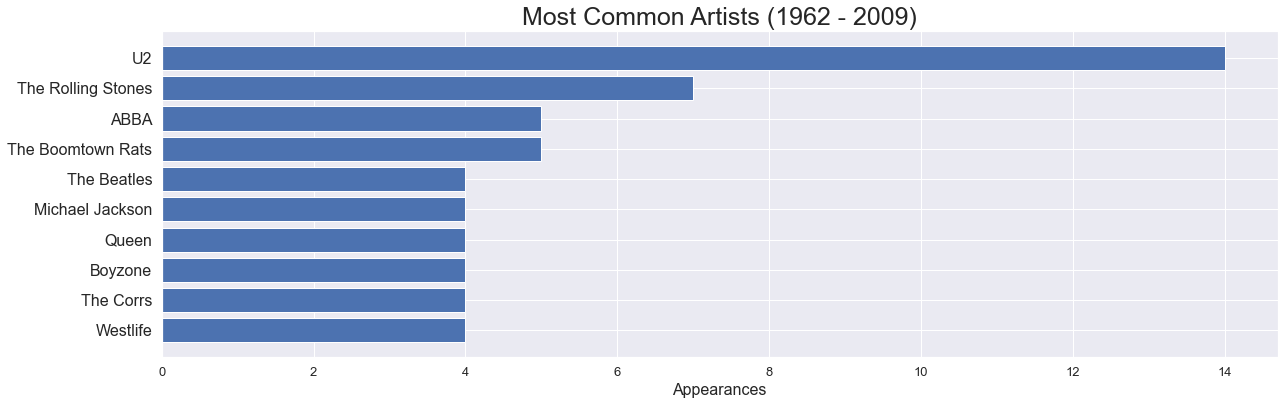

In [2]:
overall_artists = []
for song in all_tracks:
    overall_artists.append(song['track']['artists'][0]['name'])
    
counts = Counter(overall_artists).most_common()[:10]
common_artists = {}
for i in range(9, -1, -1):
    common_artists[counts[i][0]] = counts[i][1]

plt.figure(figsize=(20, 6))
plt.title("Most Common Artists (1962 - 2009)", fontsize=25)
plt.barh(range(len(common_artists)), list(common_artists.values()), align='center')
plt.yticks(range(len(common_artists)), list(common_artists.keys()), fontsize=16)
plt.xlabel("Appearances", fontsize=16)
plt.xticks(fontsize=13)
plt.show()

### Most Popular Artists Each Decade
Each wordcloud gives an overview of the most used artists for that decade

In [3]:
def wordclouds(d, title, colors):
    overall_artists = []
    for song in decades[d]:
        overall_artists.append(song['track']['artists'][0]['name'])

    counts = list(Counter(overall_artists))
    wordcloud = WordCloud(font_path='arial', width=1600, height=800, colormap=colors).generate_from_frequencies(Counter(overall_artists))
    plt.figure(figsize=(20,10), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, color="k", fontsize=20)
    plt.show()

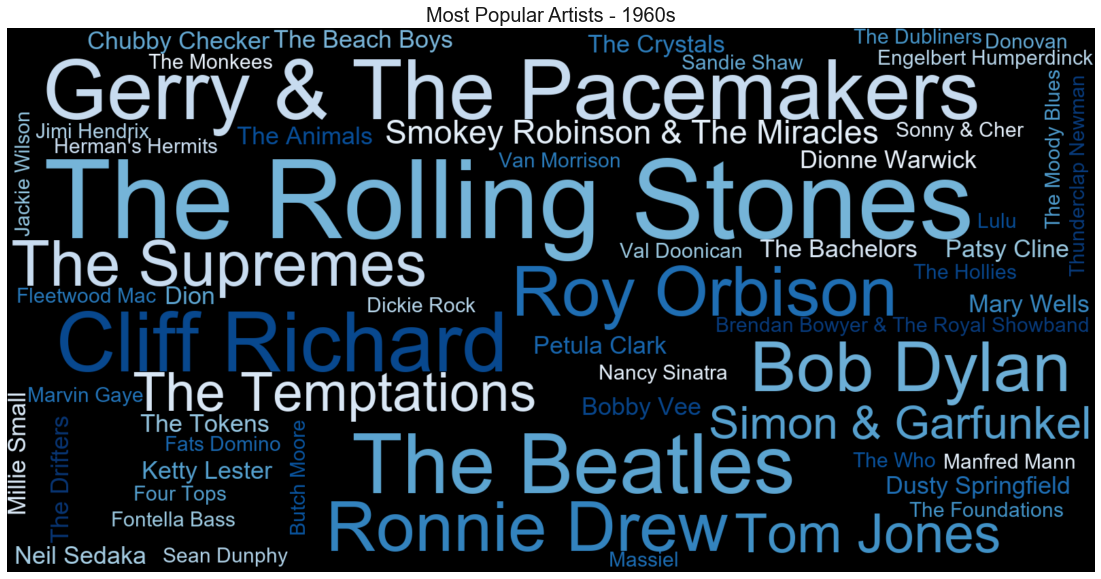

In [4]:
wordclouds(60, "Most Popular Artists - 1960s", "Blues")

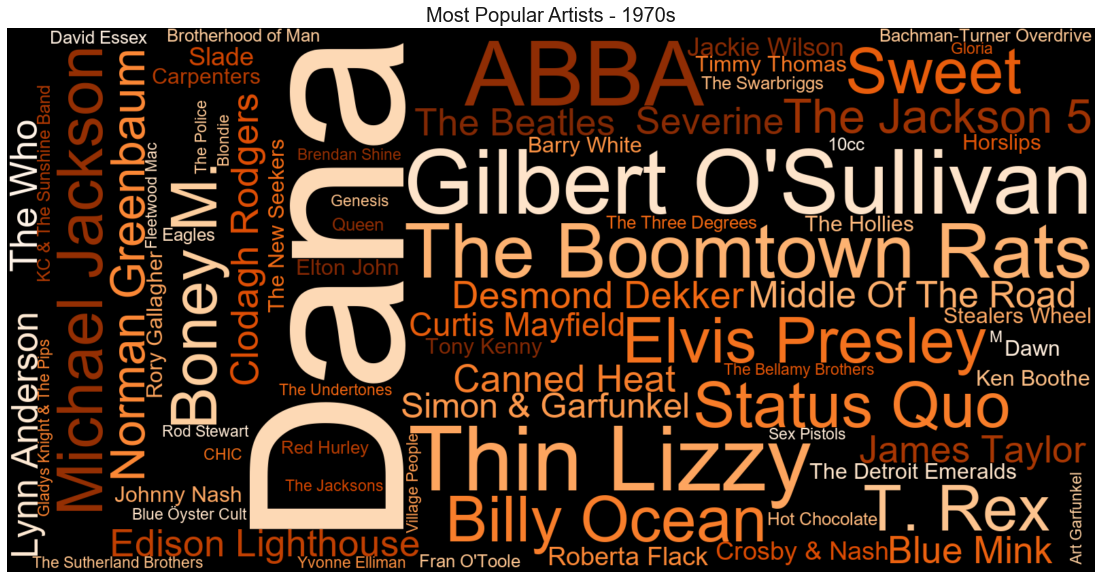

In [5]:
wordclouds(70, "Most Popular Artists - 1970s", "Oranges")

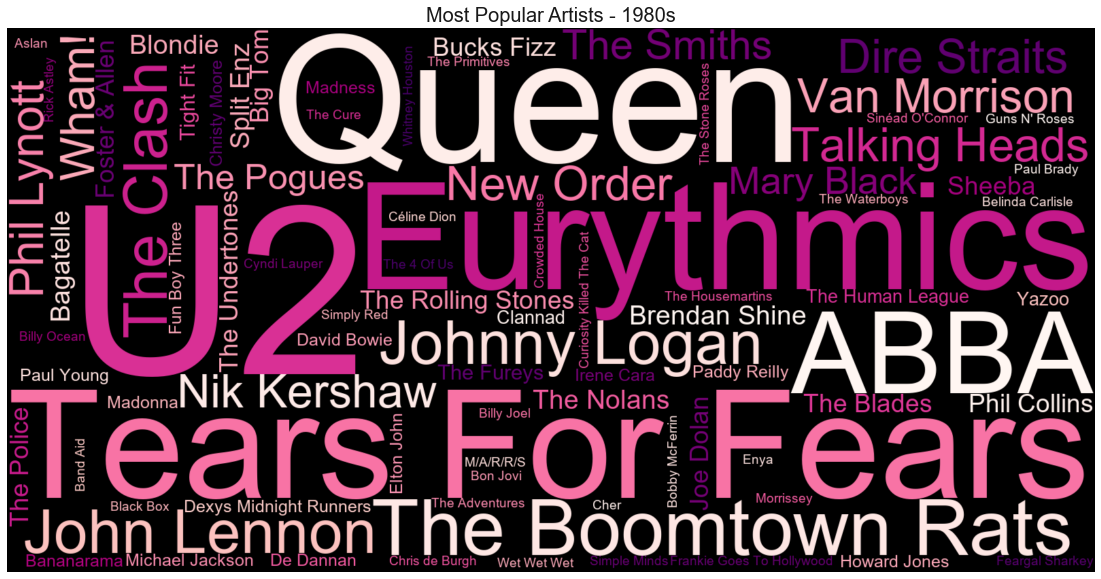

In [6]:
wordclouds(80, "Most Popular Artists - 1980s", "RdPu")

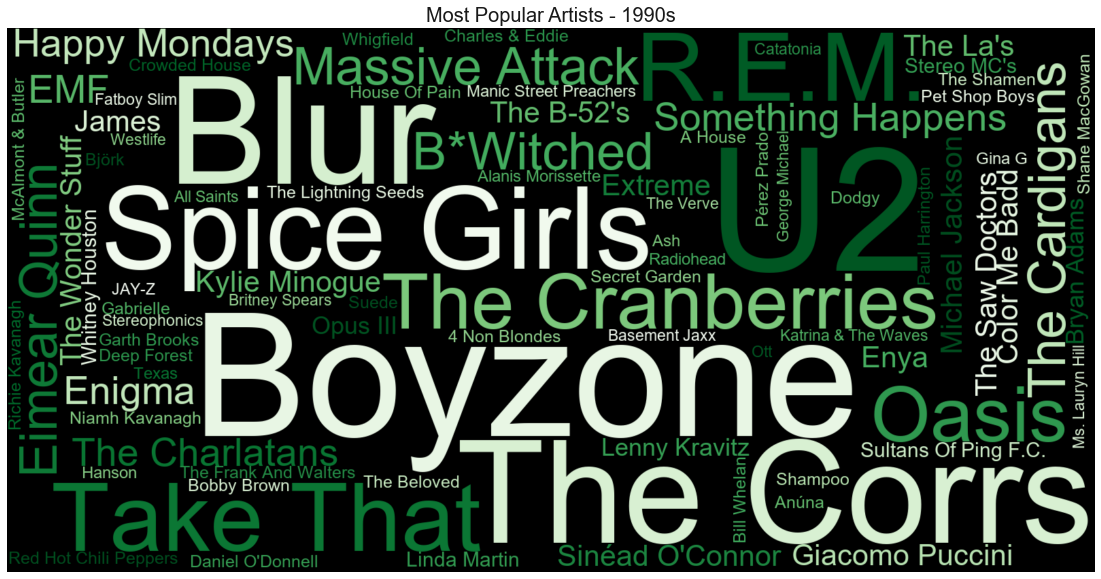

In [7]:
wordclouds(90, "Most Popular Artists - 1990s", "Greens")

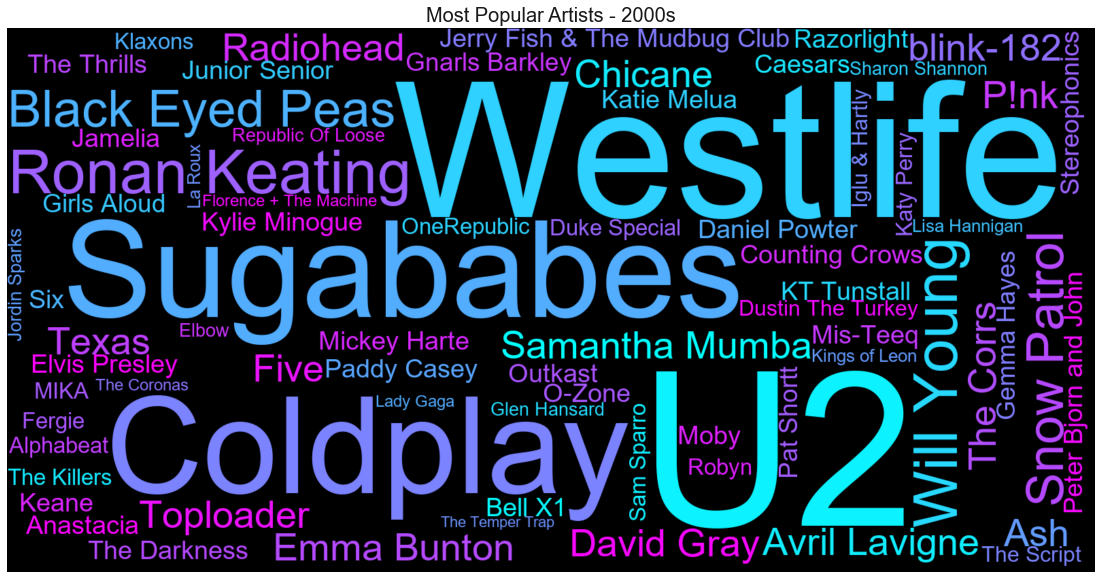

In [8]:
wordclouds(2000, "Most Popular Artists - 2000s", "cool")

## Most Common Genres

A full list of Spotify's genres can be found here: http://everynoise.com/

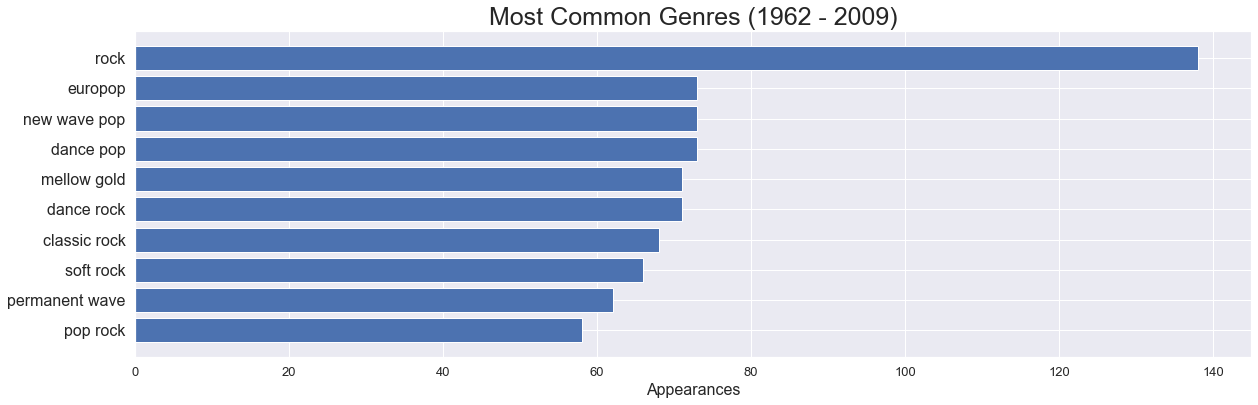

In [9]:
overall_genres = []
for song in all_tracks:
    artist_genres = sp.artist(song['track']['artists'][0]['id'])['genres']
    for genre in artist_genres:
        overall_genres.append(genre)
    
counts = Counter(overall_genres).most_common()[:10]
common_genres = {}

for i in range(9, -1, -1):
    common_genres[counts[i][0]] = counts[i][1]

plt.figure(figsize=(20, 6))
plt.title("Most Common Genres (1962 - 2009)", fontsize=25)
plt.barh(range(len(common_genres)), list(common_genres.values()), align='center')
plt.yticks(range(len(common_genres)), list(common_genres.keys()), fontsize=16)
plt.xlabel("Appearances", fontsize=16)
plt.xticks(fontsize=13)
plt.show()

### Most Common Genres in Each Decade

In [10]:
def genre_by_decade(d, title):
    overall_genres = []
    for song in decades[d]:
        artist_genres = sp.artist(song['track']['artists'][0]['id'])['genres']
        for genre in artist_genres:
            overall_genres.append(genre)

    counts = list(Counter(overall_genres).most_common()[:5])
    common_genres = {}

    for i in range(4, -1, -1):
        common_genres[counts[i][0]] = counts[i][1]


    plt.figure(figsize=(20, 6))
    plt.title(title, fontsize=25)
    plt.barh(range(len(common_genres)), list(common_genres.values()), align='center')
    plt.yticks(range(len(common_genres)), list(common_genres.keys()), fontsize=16)
    plt.xlabel("Appearances", fontsize=16)
    plt.xticks(fontsize=13)
    plt.title(title, fontsize=25)
    plt.show()

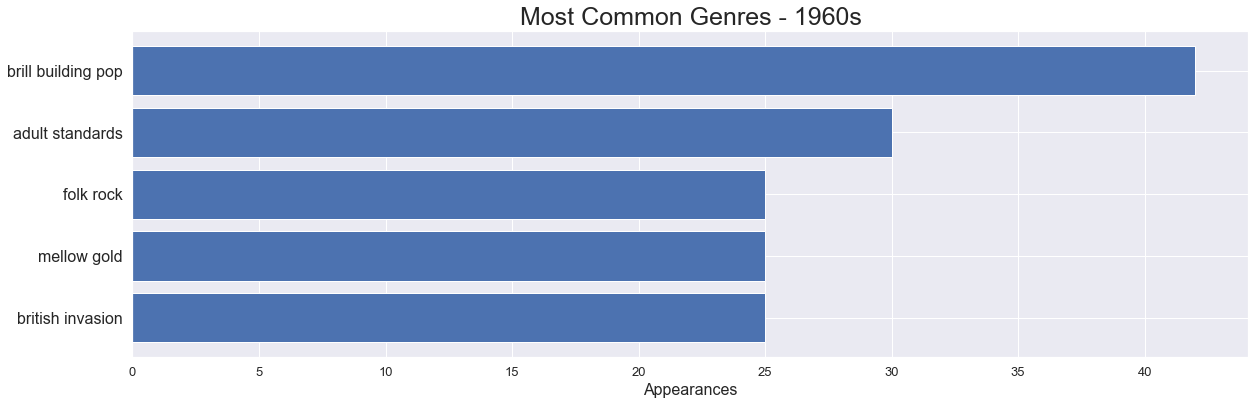

In [11]:
genre_by_decade(60, "Most Common Genres - 1960s")

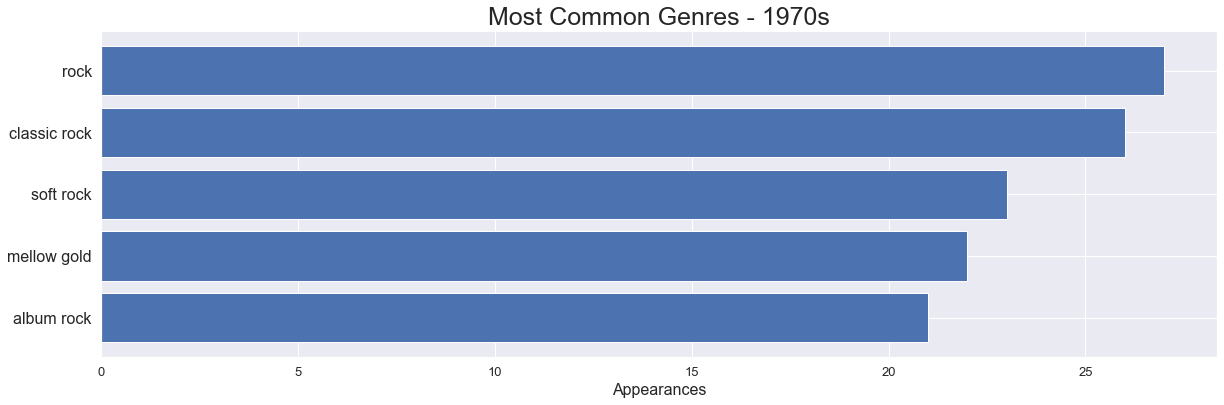

In [12]:
genre_by_decade(70, "Most Common Genres - 1970s")

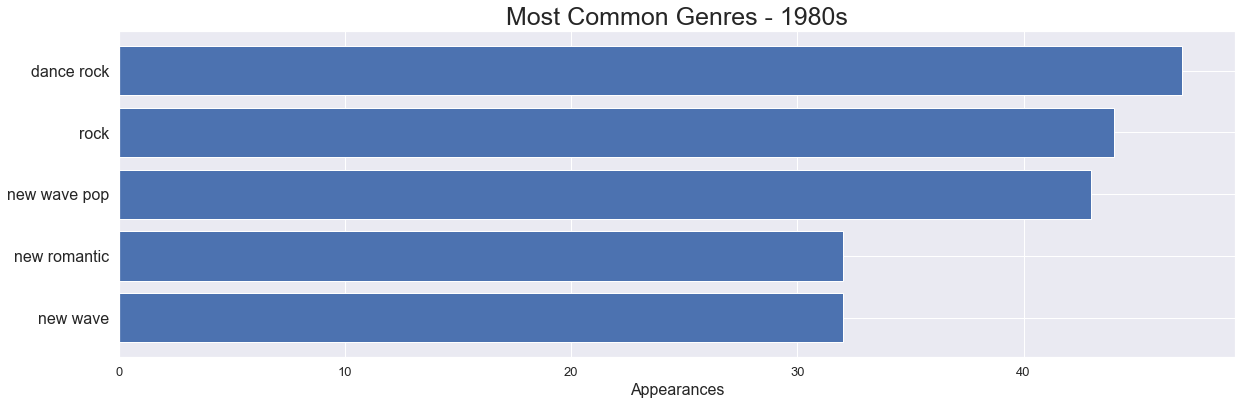

In [13]:
genre_by_decade(80, "Most Common Genres - 1980s")

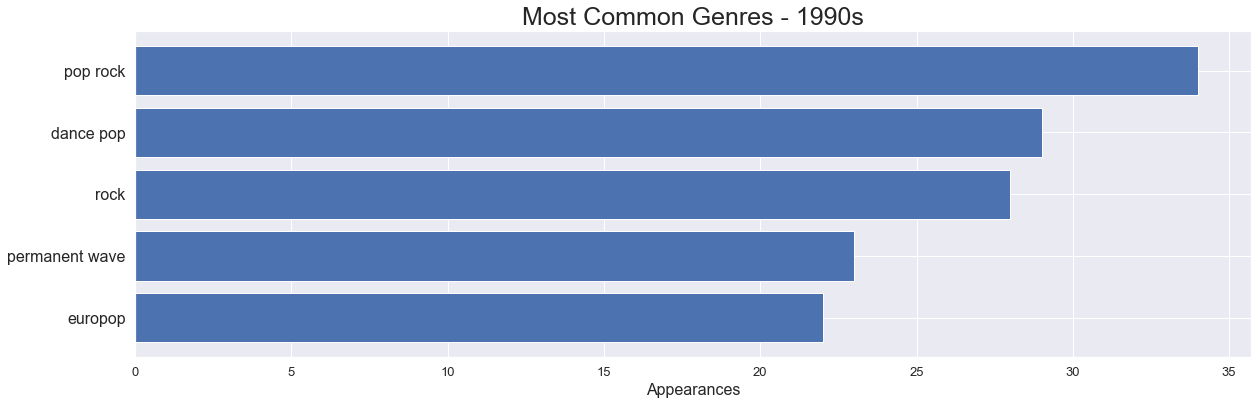

In [14]:
genre_by_decade(90, "Most Common Genres - 1990s")

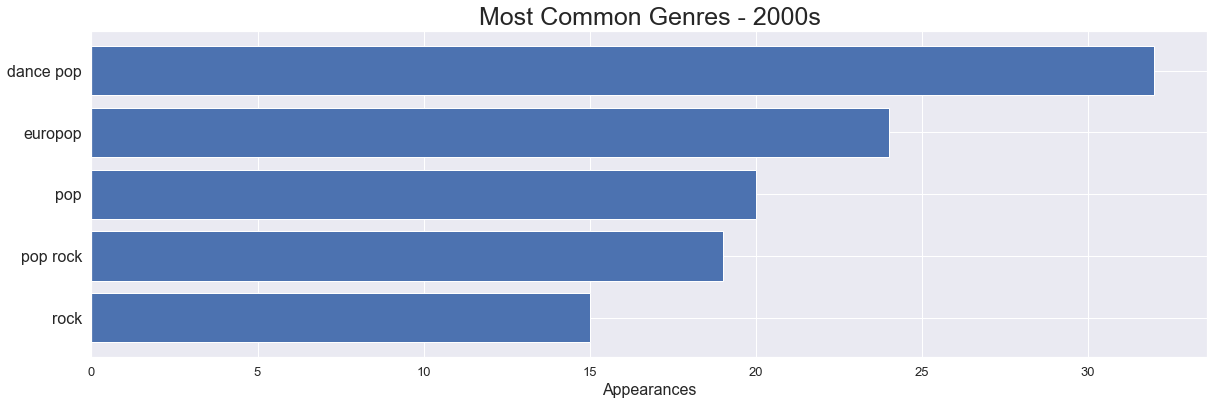

In [15]:
genre_by_decade(2000, "Most Common Genres - 2000s")

### Most Popular Genre Each Year

In [16]:
def genre_by_year(y):
    overall_genres = []
    for song in years[y]:
        artist_genres = sp.artist(song['track']['artists'][0]['id'])['genres']
        for genre in artist_genres:
            overall_genres.append(genre)

    win = Counter(overall_genres).most_common()[0][0]
    print(y,"-", win)
    
for i in range(1962,2010):
    genre_by_year(i)

1962 - adult standards
1963 - adult standards
1964 - brill building pop
1965 - brill building pop
1966 - british invasion
1967 - classic rock
1968 - brill building pop
1969 - brill building pop
1970 - classic rock
1971 - folk rock
1972 - adult standards
1973 - classic rock
1974 - album rock
1975 - glam rock
1976 - mellow gold
1977 - rock
1978 - disco
1979 - dance rock
1980 - rock
1981 - rock
1982 - dance rock
1983 - dance rock
1984 - new wave pop
1985 - dance rock
1986 - new wave pop
1987 - dance rock
1988 - new wave pop
1989 - rock
1990 - britpop
1991 - rock
1992 - hip house
1993 - dance pop
1994 - pop rock
1995 - dance pop
1996 - britpop
1997 - dance pop
1998 - dance pop
1999 - dance pop
2000 - dance pop
2001 - dance pop
2002 - dance pop
2003 - europop
2004 - rock
2005 - pop rock
2006 - modern rock
2007 - dance pop
2008 - dance pop
2009 - dance pop


### Average Happiness Each Year

The audio feautre 'valence' is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 

This graph shows the average valence of each year.

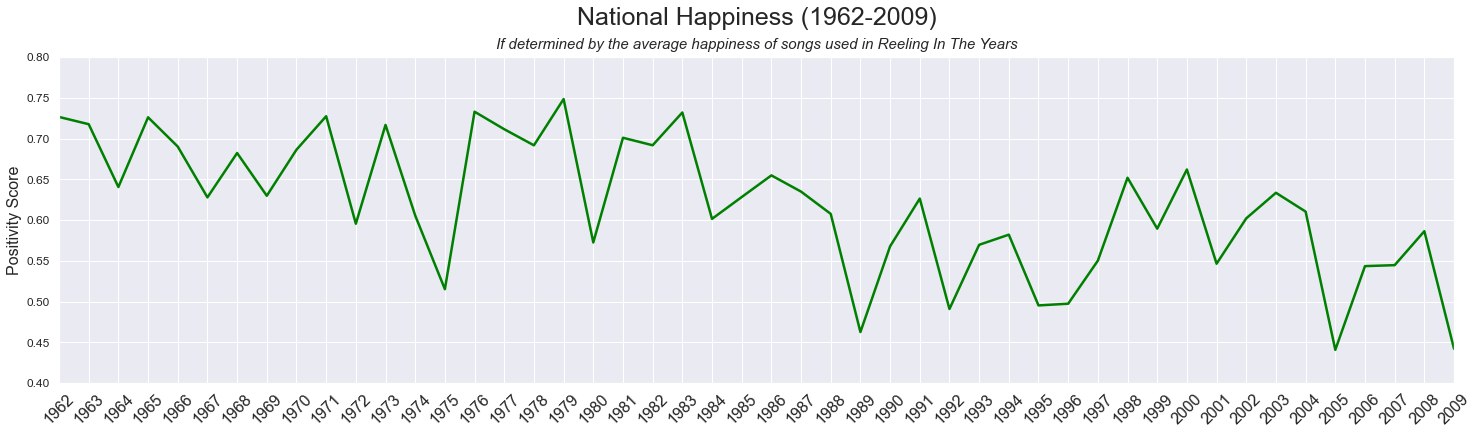

In [17]:
happiness = {}

for year in range(1962,2010):
    total = [sp.audio_features(song['track']['id'])[0]['valence'] for song in years[year]]
    av = sum(total)/len(total)
    happiness[year] = av
    
plt.figure(figsize=(25, 6))
sns.lineplot(range(len(happiness)), list(happiness.values()),  color='green', linewidth=2.5)
plt.xticks(range(len(happiness)), list(happiness.keys()), fontsize=16, rotation = (45), va='center', ha="center", position=(0,-0.05))
plt.yticks(fontsize=12)
plt.ylabel("Positivity Score", fontsize=16)
plt.ylim(0.4,0.8)
plt.margins(x=0)
plt.title("National Happiness (1962-2009)", fontsize=25,  y=1.08)
plt.figtext(0.5125,.9,'If determined by the average happiness of songs used in Reeling In The Years',fontsize=15,ha='center', fontstyle='italic')
plt.savefig('reelinginthehappiness.png', dpi=100)
plt.show()

### Danceability of Each Year

The audio feautre 'Danceability' describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

This graph shows the average dancability of each year.

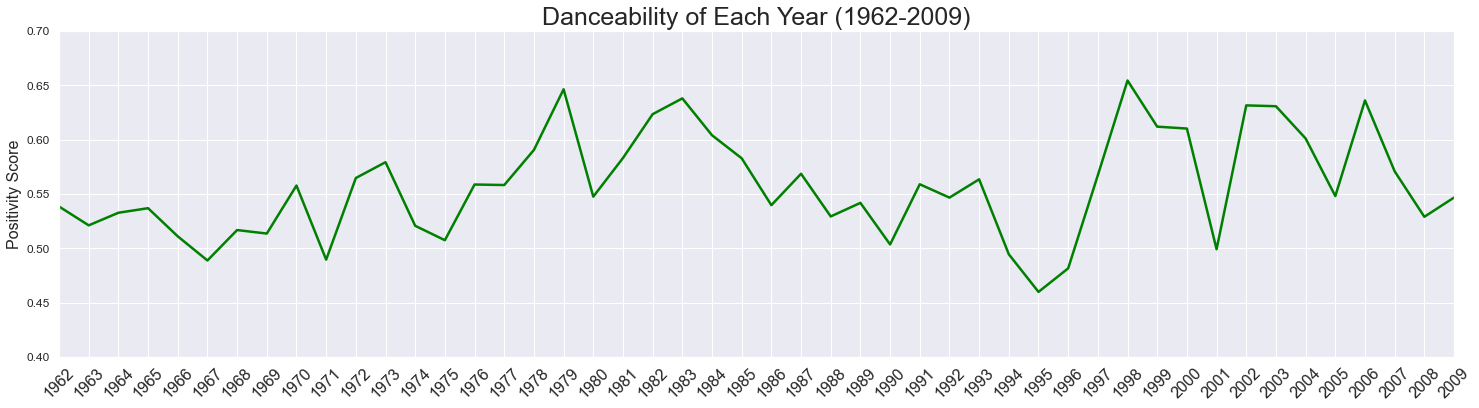

In [19]:
danceability = {}

for year in range(1962,2010):
    total = [sp.audio_features(song['track']['id'])[0]['danceability'] for song in years[year]]
    av = sum(total)/len(total)
    danceability[year] = av

plt.figure(figsize=(25, 6))
sns.lineplot(range(len(danceability)), list(danceability.values()),  color='green', linewidth=2.5)
plt.xticks(range(len(danceability)), list(danceability.keys()), fontsize=16, rotation = (45), va='center', ha="center", position=(0,-0.05))
plt.yticks(fontsize=12)
plt.ylabel("Positivity Score", fontsize=16)
plt.ylim(0.4,0.7)
plt.margins(x=0)
plt.title("Danceability of Each Year (1962-2009)", fontsize=25)
plt.show()

### The Most Important Question

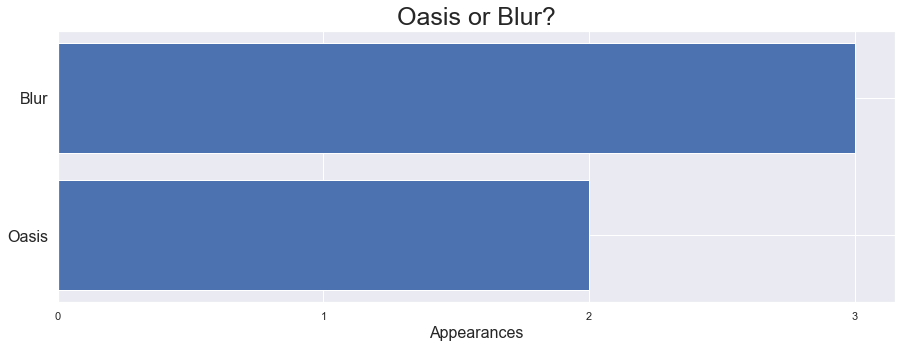

In [34]:
oasis = 0
blur = 0

for song in all_tracks:
    if "Oasis" in song['track']['artists'][0]['name']:
        oasis+=1
    elif "Blur" in song['track']['artists'][0]['name']:
        blur += 1
        
plt.figure(figsize=(15, 5))
plt.barh(['Oasis', "Blur"], [oasis, blur])
plt.xticks([0,1,2,3])
plt.yticks(fontsize=16)
plt.xlabel("Appearances", fontsize=16)
plt.title("Oasis or Blur?", fontsize=25)
plt.show()